# load_breast_cancer : 유방암 여부 진단

## 필요한 모듈 불러오기

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_curve, roc_auc_score

## 데이터 준비하기

### load_breast_cancer

In [4]:
breast_cancer = load_breast_cancer()

print(type(breast_cancer))

<class 'sklearn.utils._bunch.Bunch'>


### load_breast_cancer 속성 출력

In [5]:
for attr in dir(breast_cancer):
    if not attr.startswith('_'): print(attr)

DESCR
data
data_module
feature_names
filename
frame
target
target_names


## 데이터 이해하기

### 데이터셋 설명

In [6]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**DESCR**
breast_cancer : 위스콘신 유방암 진단 데이터셋

**Data Set Characteristics:**
- :Number of Instances: 569
- :Number of Attributes: 30개의 숫자형 예측 속성과 클래스
- :Attribute Information:
    - radius : 반경(중심에서 둘레까지의 거리의 평균)
    - texture : 질감 (회색조 값의 표준 편차)
    - perimeter : 둘레
    - area : 면적
    - smoothness : 매끄러움 (반경 길이의 지역 변동)
    - compactness : 조밀도 (둘레^2 / 면적 - 1.0)
    - concavity : 오목함 (등고선의 오목한 부분의 심각성)
    - concave points : 오목한 지점 (등고선의 오목한 부분의 수)
    - symmetry : 대칭
    - fractal dimension : 프랙탈 차원 ("해안선 근사" - 1)

### Feature Data 지정

- data 확인

In [7]:
data = breast_cancer.data
data.shape

(569, 30)

- 샘플 데이터

In [8]:
data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

- feature names 출력

In [9]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Target Data 지정

In [10]:
target = breast_cancer.target
target.shape

(569,)

In [11]:
target[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

- target names 출력

In [12]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

### Describe

- pandas

In [16]:
df = pd.DataFrame(data=data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [17]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


- numpy

In [18]:
mean = np.mean(data)
std = np.std(data)
minimum = np.min(data)
maximum = np.max(data)

print(f'평균 : {mean:.4f}')
print(f'표준편차 : {std:.4f}')
print(f'최소값 : {minimum}')
print(f'최대값 : {maximum}')

평균 : 61.8907
표준편차 : 228.2974
최소값 : 0.0
최대값 : 4254.0


## train, test 데이터 분리

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42)

In [20]:
print(f'X train shape : {X_train.shape}')
print(f'y train shape : {y_train.shape}')
print(f'X test shape : {X_test.shape}')
print(f'y test shape : {y_test.shape}')

X train shape : (455, 30)
y train shape : (455,)
X test shape : (114, 30)
y test shape : (114,)


## 다양한 모델로 학습 및 평가

### Decision Tree

#### 모델 생성

In [21]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

#### 모델 속성 출력

In [22]:
for attr in dir(clf):
    if not attr.startswith('_'): print(attr)

apply
ccp_alpha
class_weight
cost_complexity_pruning_path
criterion
decision_path
feature_importances_
fit
get_depth
get_metadata_routing
get_n_leaves
get_params
max_depth
max_features
max_leaf_nodes
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
predict
predict_log_proba
predict_proba
random_state
score
set_fit_request
set_params
set_predict_proba_request
set_predict_request
set_score_request
splitter


#### 모델 학습

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
y_pred = clf.predict(X_test)

In [25]:
print(f'depth = {clf.get_depth()}')
print(f'leaves = {clf.get_n_leaves()}')

depth = 7
leaves = 16


#### 모데 평가

In [27]:
accuracy = clf.score(X_test, y_test) # R-squared 값을 반환하는 메서드
print(f'{accuracy = }')

accuracy = 0.9385964912280702


In [28]:
accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f'{accuracy_sklearn = }')

accuracy_sklearn = 0.9385964912280702


In [29]:
recall = recall_score(y_test, y_pred)
print(f'{recall = }')

recall = 0.9436619718309859


In [33]:
# ROC 커브를 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# AUC 값을 계산.
auc = roc_auc_score(y_test, y_pred)
print(f'{auc = }')

auc = 0.9369472649852605


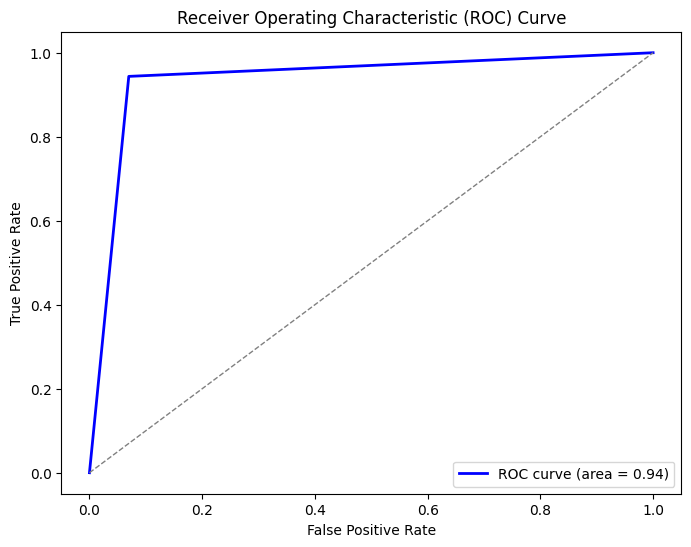

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 결과 분석

결정 트리 모델은 총 16개의 리프 노드를 가지며, 테스트 데이터에서 약 93.9%의 정확도를 보여준다.   
또한, 재현율은 약 94.4%로 나타났으며, ROC 커브의 AUC 값은 0.937이다.   
이 모델은 특히 재현율과 정확도 측면에서 높은 성능을 보여준다.

### RandomForest

#### 모델 생성

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

#### 모델 속성 출력

In [35]:
for attr in dir(rfc):
    if not attr.startswith('_'): print(attr)

apply
base_estimator
base_estimator_
bootstrap
ccp_alpha
class_weight
criterion
decision_path
estimator
estimator_params
feature_importances_
fit
get_metadata_routing
get_params
max_depth
max_features
max_leaf_nodes
max_samples
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
n_estimators
n_jobs
oob_score
predict
predict_log_proba
predict_proba
random_state
score
set_fit_request
set_params
set_score_request
verbose
warm_start


#### 모델 학습

In [36]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_pred = rfc.predict(X_test)

In [38]:
print(f'n_estimators = {rfc.n_estimators}')

n_estimators = 100


#### 모델 평가

In [39]:
accuracy = rfc.score(X_test, y_test)
print(f'{accuracy = }')

accuracy = 0.956140350877193


In [40]:
accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f'{accuracy_sklearn = }')

accuracy_sklearn = 0.956140350877193


In [41]:
recall = recall_score(y_test, y_pred)
print(f'{recall = }')

recall = 0.971830985915493


In [43]:
# ROC 커브를 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# AUC 값을 계산.
auc = roc_auc_score(y_test, y_pred)
print(f'{auc = }')

auc = 0.9510317720275139


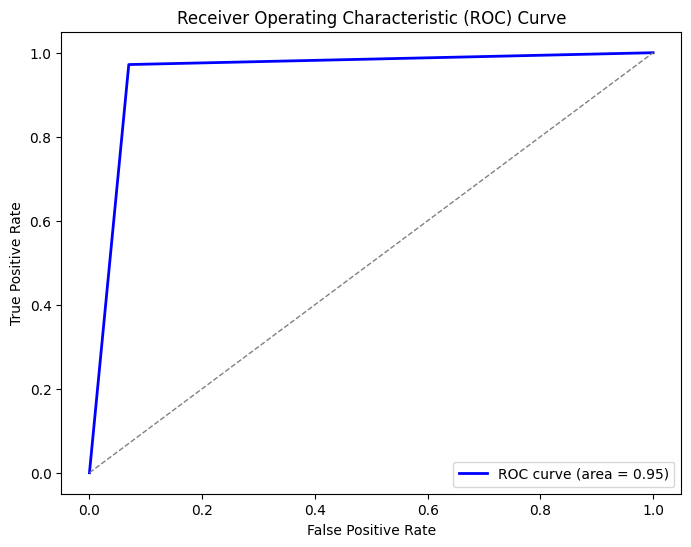

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 결과 분석

랜덤 포레스트 모델은 100개의 트리를 사용하여 학습되었으며, 테스트 데이터에서 약 95.6%의 정확도를 보여준다.   
또한, 재현율은 약 97.2%로 나타났으며, ROC 커브의 AUC 값은 0.951이다.  
이 모델은 높은 정확도와 재현율을 보여주어 데이터를 잘 분류하는 경향을 보인다.

### SVM

#### 모델 생성

In [45]:
from sklearn.svm import SVC

svm = SVC()

#### 모델 속성 출력

In [46]:
for attr in dir(svm):
    if not attr.startswith('_') : print(attr)

C
break_ties
cache_size
class_weight
coef0
coef_
decision_function
decision_function_shape
degree
epsilon
fit
gamma
get_metadata_routing
get_params
kernel
max_iter
n_support_
nu
predict
predict_log_proba
predict_proba
probA_
probB_
probability
random_state
score
set_fit_request
set_params
set_score_request
shrinking
tol
unused_param
verbose


#### 모델 학습

In [47]:
svm.fit(X_train, y_train)

SVC()

In [48]:
y_pred = svm.predict(X_test)

In [49]:
print(f'n_support_ = {svm.n_support_}')
print(f'kernel = {svm.kernel}')

n_support_ = [67 64]
kernel = rbf


#### 모델 평가

In [50]:
accuracy = svm.score(X_test, y_test)
print(f'{accuracy = }')

accuracy = 0.9473684210526315


In [51]:
accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f'{accuracy_sklearn = }')

accuracy_sklearn = 0.9473684210526315


In [52]:
recall = recall_score(y_test, y_pred)
print(f'{recall = }')

recall = 1.0


In [53]:
# ROC 커브를 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# AUC 값을 계산.
auc = roc_auc_score(y_test, y_pred)
print(f'{auc = }')

auc = 0.9302325581395349


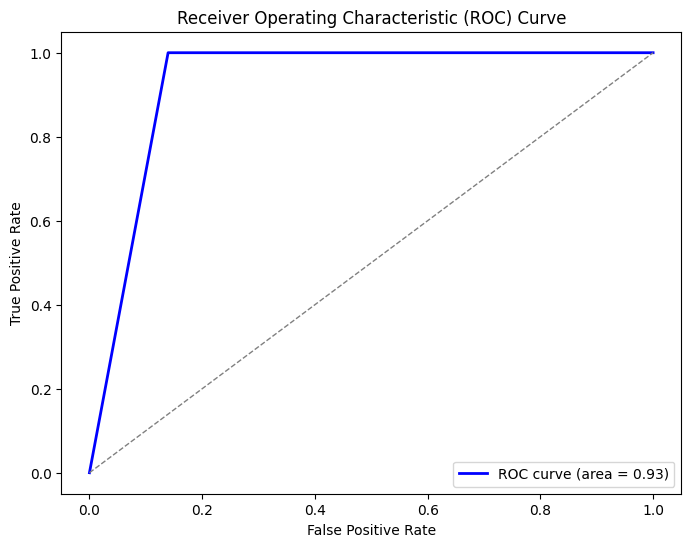

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 결과 분석
SVM 모델은 테스트 데이터에서 약 94.7%의 정확도를 보여준다.  
또한, 모든 양성 클래스 샘플에 대해 100%의 재현율을 보여준다.   
ROC 커브의 AUC 값은 0.930으로 나타났다.  
이 모델은 높은 정확도와 완벽한 재현율을 보여주어 데이터를 잘 분류하는 경향을 보인다.

### SGD Classifier

#### 모델 생성

In [55]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

#### 모델 속성 출력

In [56]:
for attr in dir(sgd):
    if not attr.startswith('_'): print(attr)

C
alpha
average
class_weight
decision_function
densify
early_stopping
epsilon
eta0
fit
fit_intercept
get_metadata_routing
get_params
l1_ratio
learning_rate
loss
loss_functions
max_iter
n_iter_no_change
n_jobs
partial_fit
penalty
power_t
predict
predict_log_proba
predict_proba
random_state
score
set_fit_request
set_params
set_partial_fit_request
set_score_request
shuffle
sparsify
tol
validation_fraction
verbose
warm_start


#### 모델 학습

In [57]:
sgd.fit(X_train, y_train)

SGDClassifier()

In [58]:
y_pred = sgd.predict(X_test)

In [59]:
print(f'intercept: {sgd.intercept_}')
print(f'loss: {sgd.loss}')
print(f'penalty: {sgd.penalty}')
print(f'alpha: {sgd.alpha}')

intercept: [1399.88491782]
loss: hinge
penalty: l2
alpha: 0.0001


#### 모델 평가

In [60]:
accuracy = sgd.score(X_test, y_test)
print(f'{accuracy = }')

accuracy = 0.956140350877193


In [61]:
accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f'{accuracy_sklearn = }')

accuracy_sklearn = 0.956140350877193


In [63]:
recall = recall_score(y_test, y_pred)
print(f'{recall = }')

recall = 1.0


In [64]:
# ROC 커브를 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# AUC 값을 계산.
auc = roc_auc_score(y_test, y_pred)
print(f'{auc = }')

auc = 0.9418604651162791


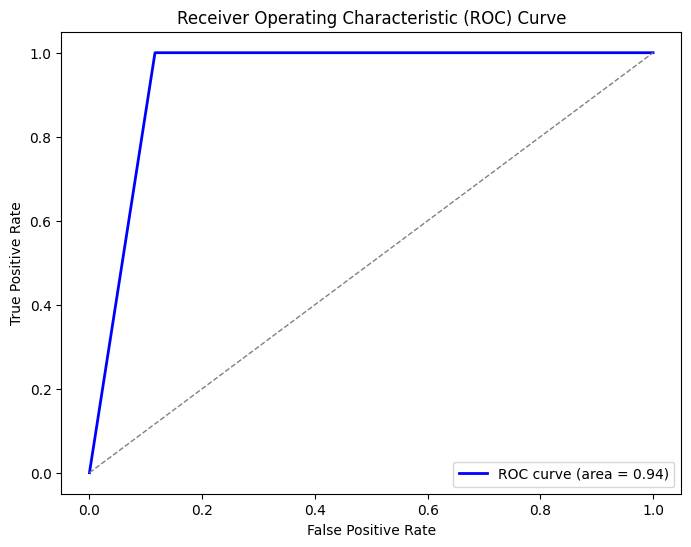

In [65]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 결과 분석
SDG Classifier 모델은 테스트 데이터에서 약 95.6%의 정확도를 보여준다.  
또한, 모든 양성 클래스 샘플에 대해 100%의 재현율을 보였으며, ROC 커브의 AUC 값은 0.942로 나타났다.  
이 모델은 높은 정확도와 완벽한 재현율을 보여주어 데이터를 잘 분류하는 경향을 보인다.

### Logistic Regression

#### 모델 생성

In [66]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#### 모델 속성 출력

In [67]:
for attr in dir(lr):
    if not attr.startswith('_'): print(attr)

C
class_weight
decision_function
densify
dual
fit
fit_intercept
get_metadata_routing
get_params
intercept_scaling
l1_ratio
max_iter
multi_class
n_jobs
penalty
predict
predict_log_proba
predict_proba
random_state
score
set_fit_request
set_params
set_score_request
solver
sparsify
tol
verbose
warm_start


#### 모델 학습

In [68]:
lr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_pred = lr.predict(X_test)

In [70]:
print(f'intercept: {lr.intercept_}')
print(f'classes: {lr.classes_}')
print(f'n_iter: {lr.n_iter_}')

intercept: [0.21342909]
classes: [0 1]
n_iter: [100]


#### 모델 평가

In [71]:
accuracy = lr.score(X_test, y_test)
print(f'{accuracy = }')

accuracy = 0.9649122807017544


In [72]:
accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f'{accuracy_sklearn = }')

accuracy_sklearn = 0.9649122807017544


In [73]:
recall = recall_score(y_test, y_pred)
print(f'{recall = }')

recall = 0.9859154929577465


In [74]:
# ROC 커브를 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# AUC 값을 계산.
auc = roc_auc_score(y_test, y_pred)
print(f'{auc = }')

auc = 0.9580740255486406


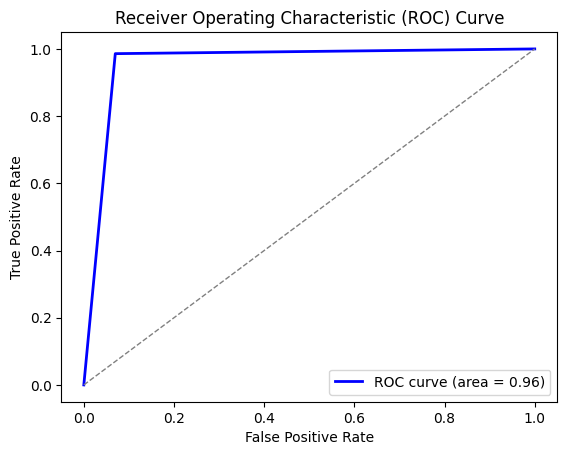

In [75]:
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### 결과 분석

로지스틱 회귀 모델은 테스트 데이터에서 약 96.5%의 정확도를 보여준다.  
또한, 양성 클래스 샘플에 대한 재현율은 약 98.6%로 나타났으며, ROC 커브의 AUC 값은 0.958로 나타났다.  
이 모델은 높은 정확도와 뛰어난 재현율을 보여주어 데이터를 잘 분류하는 경향을 보입니다.

## 모델 평가해 보기

유방암 진단과 같은 중요한 의료 응용 분야에서는 거짓 음성을 최소화하는 것이 매우 중요하다.  

**정확도(accuracy)**  
전체 예측 중 올바르게 분류된 예측의 비율을 나타내므로, 다중 클래스 분류 문제에서 일반적으로 사용되는 지표

**재현율 (Recall)**  
실제 양성 샘플 중에서 모델이 올바르게 양성으로 분류한 비율을 나타내므로, 거짓 음성을 최소화하려는 경우에 중요한 지표

**ROC 곡선 및 AUC**
모델의 분류 성능을 시각적으로 확인하는 데 사용됩  
ROC 곡선은 재현율과 거짓 양성 비율 간의 관계를 보여주며, AUC는 ROC 곡선 아래의 면적으로 모델의 성능을 요약